# EXAM1_TUO LI #

Note: All the calculations are done with Python in this notebook. The Excel sheets including the plots were the exports from this notebook.

# Import libraries #

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Optimal Portfolio Allocation #

# Question 1 #

## • Formulate the Lagrangian and give its partial derivatives. ##

With two Lagrange multipliers $\lambda$ and $\gamma$, the Lagrangian function is:
$$ L(\omega, \lambda, \gamma) = \frac{1}{2}w^T{\Sigma}w + {\lambda}(m-{{\mu}^T}w) + {\gamma}(1 - {\boldsymbol{1}^T}w)$$
While:
$$ {\Sigma} = SRS $$

Here:
- $w$ is the vector of weights.
- ${\Sigma}$ is the covariance matrix.
- $m$ is the prespecified portfolio return.
- ${\mu}$ is the vector of asset expected returns.
- $R$ is the correlation matrix.
- $S$ is the diagonal standard deviation matrix.


Then, we will have the following partial derivatives:
$$ \frac{\partial L}{\partial w} (\omega, \lambda, \gamma) = w^T{\Sigma} - \lambda {\mu}^T - \gamma {\boldsymbol{1}^T}$$
$$ \frac{\partial L}{\partial \lambda} (\omega, \lambda, \gamma) = m-{{\mu}^T}w$$
$$ \frac{\partial L}{\partial \gamma} (\omega, \lambda, \gamma) = 1 - {\boldsymbol{1}^T}w$$

## • Write down the analytical solution for $w^*$ optimal allocations – no derivation required. ##

To have the optimial allocations $w^*$, we need to have these first order deravatives equal to zero:
$$ \frac{\partial L}{\partial w} (\omega, \lambda, \gamma) = w^T{\Sigma} - \lambda {\mu}^T - \gamma {\boldsymbol{1}^T} = 0 $$
$$ \frac{\partial L}{\partial \lambda} (\omega, \lambda, \gamma) = m-{{\mu}^T}w = 0 $$
$$ \frac{\partial L}{\partial \gamma} (\omega, \lambda, \gamma) = 1 - {\boldsymbol{1}^T}w = 0 $$

Then we will have the following result:
$$ w^* = {\Sigma}^{-1}(\lambda \mu + \gamma {\boldsymbol{1}})$$

Where:
$$ \lambda = \frac{Am-B}{AC-B^2}$$
$$ \gamma = \frac{C-Bm}{AC-B^2}$$

and:
$$ A = {\boldsymbol{1}^T}{\Sigma}^{-1}{\boldsymbol{1}} $$
$$ B = {\mu^T}{\Sigma}^{-1}{\boldsymbol{1}} $$
$$ C = {\mu^T}{\Sigma}^{-1}{\mu} $$

_We can also rewrite $w^*$ by substituing $\mu$ and $\lambda$:_
$$ w^* = \frac{1}{AC-B^2}{\Sigma}^{-1}[(A \mu - B {\boldsymbol{1}})m + (C{\boldsymbol{1}} - B \mu)]$$

## • Compute allocations $w^*$ and portfolio risk ${\sigma}_{\Pi} = \sqrt{w'Σw}$, for $m = 4.5\%$ ##

Before getting started, we need to do some preparation works. <br>
First of all, we will define our vector of returns $μ$:
$${\mu} = \begin{pmatrix}0.02\\ 0.07\\ 0.15\\ 0.2\end{pmatrix}$$

In [4]:
mu = np.array([[0.02], [0.07], [0.15],[0.2]])

Then, we need to construct the standard deviation matrix $S$:
$$ S = \begin{pmatrix}
0.05 & 0 & 0 & 0
\\ 0 & 0.12 & 0 & 0
\\ 0 & 0 & 0.17 & 0
\\ 0 & 0 & 0 & 0.25
\end{pmatrix} $$

In [5]:
S = np.array([[0.05, 0, 0, 0], [0, 0.12, 0, 0], [0, 0, 0.17, 0], [0, 0, 0, 0.25]])

With $S$, we can have the convariance matrix $\Sigma$ with the following calculation: $$ \Sigma = SRS = \begin{pmatrix}
0.05 & 0 & 0 & 0
\\ 0 & 0.12 & 0 & 0
\\ 0 & 0 & 0.17 & 0
\\ 0 & 0 & 0 & 0.25
\end{pmatrix} 
\begin{pmatrix}
1 & 0.3 & 0.3 & 0.3
\\ 0.3 & 1 & 0.6 & 0.6
\\ 0.3 & 0.6 & 1 & 0.6
\\ 0.3 & 0.6 & 0.6 & 1
\end{pmatrix}
\begin{pmatrix}
0.05 & 0 & 0 & 0
\\ 0 & 0.12 & 0 & 0
\\ 0 & 0 & 0.17 & 0
\\ 0 & 0 & 0 & 0.25
\end{pmatrix} = 
\begin{pmatrix}
0.0025 & 0.0018 & 0.00255 & 0.00375
\\ 0.0018 & 0.0144 & 0.01224 & 0.018
\\ 0.00255 & 0.01224 & 0.0289 & 0.0255
\\ 0.00375 & 0.018 & 0.0255 & 0.0625
\end{pmatrix}$$

In [6]:
R = np.array([[1, 0.3, 0.3, 0.3], [0.3, 1, 0.6, 0.6], [0.3, 0.6, 1, 0.6], [0.3, 0.6, 0.6, 1]])

In [7]:
SIGMA = S@R@S
print (SIGMA) 

[[0.0025  0.0018  0.00255 0.00375]
 [0.0018  0.0144  0.01224 0.018  ]
 [0.00255 0.01224 0.0289  0.0255 ]
 [0.00375 0.018   0.0255  0.0625 ]]


Next, let's dive into the question.</br>
When $m = 4.5%$, we can calculate $A$, $B$, $C$ as follows:
$$ A = {\boldsymbol{1}^T}{\Sigma}^{-1}{\boldsymbol{1}} =
\begin{pmatrix}
1 & 1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
0.0025 & 0.0018 & 0.00255 & 0.00375
\\ 0.0018 & 0.0144 & 0.01224 & 0.018
\\ 0.00255 & 0.01224 & 0.0289 & 0.0255
\\ 0.00375 & 0.018 & 0.0255 & 0.0625
\end{pmatrix}^{-1}
\begin{pmatrix}
1
\\ 1
\\ 1
\\ 1
\end{pmatrix} \approx 423.6149806869816$$
$$ B = {\mu^T}{\Sigma}^{-1}{\boldsymbol{1}} = 
\begin{pmatrix}
0.02 & 0.07 & 0.15 & 0.2
\end{pmatrix}
\begin{pmatrix}
0.0025 & 0.0018 & 0.00255 & 0.00375
\\ 0.0018 & 0.0144 & 0.01224 & 0.018
\\ 0.00255 & 0.01224 & 0.0289 & 0.0255
\\ 0.00375 & 0.018 & 0.0255 & 0.0625
\end{pmatrix}^{-1}
\begin{pmatrix}
1
\\ 1
\\ 1
\\ 1
\end{pmatrix} \approx 6.807020715428303 
$$
$$ C = {\mu^T}{\Sigma}^{-1}{\mu} =
\begin{pmatrix}
0.02 & 0.07 & 0.15 & 0.2
\end{pmatrix}
\begin{pmatrix}
0.0025 & 0.0018 & 0.00255 & 0.00375
\\ 0.0018 & 0.0144 & 0.01224 & 0.018
\\ 0.00255 & 0.01224 & 0.0289 & 0.0255
\\ 0.00375 & 0.018 & 0.0255 & 0.0625
\end{pmatrix}^{-1}
\begin{pmatrix}
0.02
\\ 0.07
\\ 0.15
\\ 0.2
\end{pmatrix} \approx 0.9065089304034119 $$

In [8]:
m = 0.045
one = np.array([[1], [1], [1], [1]])

In [9]:
A = one.T@np.linalg.inv(SIGMA)@one
A = A[0,0].item()
print (A)

423.6149806869816


In [10]:
B = mu.T@np.linalg.inv(SIGMA)@one
B = B[0,0].item()
print (B)

6.807020715428303


In [11]:
C = mu.T@np.linalg.inv(SIGMA)@mu
C = C[0,0].item()
print(C)

0.9065089304034119


Then, we will have $\lambda$ and $\gamma$:
$$ \lambda = \frac{Am-B}{AC-B^2} \approx \frac{423.6149806869816{\times}0.045-6.807020715428303}{423.6149806869816*0.9065089304034119-6.807020715428303^2} \approx 0.036294202989022174 $$
$$ \gamma = \frac{C-Bm}{AC-B^2} \approx \frac{0.9065089304034119 - 6.807020715428303{\times}0.045}{423.6149806869816*0.9065089304034119-6.807020715428303^2} \approx 0.0017774267736771414 $$

In [12]:
lbd = (A*m - B)/(A*C-B**2)
gamma = (C-B*m)/(A*C-B**2)
print(lbd)
print(gamma)

0.036294202989022174
0.0017774267736771414


Finally, we will have the result $w^*$:
$$ w^* = {\Sigma}^{-1}(\lambda \mu + \gamma {\boldsymbol{1}}) = 
\begin{pmatrix}
0.0025 & 0.0018 & 0.00255 & 0.00375
\\ 0.0018 & 0.0144 & 0.01224 & 0.018
\\ 0.00255 & 0.01224 & 0.0289 & 0.0255
\\ 0.00375 & 0.018 & 0.0255 & 0.0625
\end{pmatrix}^{-1}
[0.036294202989022174 \begin{pmatrix}
0.02
\\ 0.07
\\ 0.15
\\ 0.2
\end{pmatrix} + 
0.0017774267736771414 \begin{pmatrix}
1
\\ 1
\\ 1
\\ 1
\end{pmatrix}] \approx
\begin{pmatrix}
0.78511066
\\ 0.05386419
\\ 0.13355472
\\ 0.02747042
\end{pmatrix}
$$

In [13]:
w_opt = np.linalg.inv(SIGMA)@(lbd*mu + gamma*one)
w_opt

array([[0.78511066],
       [0.05386419],
       [0.13355472],
       [0.02747042]])

At the same time, the portfolio risk will be: 
$$ σ_Π = \sqrt{w^TΣw} = \sqrt{ \begin{pmatrix}
0.78511066 & 0.05386419 & 0.13355472 & 0.02747042
\end{pmatrix}
\begin{pmatrix}
0.0025 & 0.0018 & 0.00255 & 0.00375
\\ 0.0018 & 0.0144 & 0.01224 & 0.018
\\ 0.00255 & 0.01224 & 0.0289 & 0.0255
\\ 0.00375 & 0.018 & 0.0255 & 0.0625
\end{pmatrix}
\begin{pmatrix}
0.78511066
\\ 0.05386419
\\ 0.13355472
\\ 0.02747042
\end{pmatrix}}  \approx 0.05840091$$


In [14]:
sigma = np.sqrt(w_opt.T@SIGMA@w_opt)
sigma = sigma[0,0].item()
print(sigma)

0.05840090674110412


### In conclusiton, my answer to this question is: ###
### $$ w^* \approx \begin{pmatrix} 78.5\% \\ 5.4\% \\ 13.4\% \\ 2.7\% \end{pmatrix}$$ ### 
### $$ {\sigma}_{\Pi}  \approx 0.05840091 $$ ###

# Question 2 #

## • Generate above 700 random allocation sets: 4 × 1 vectors. Each set has to satisfy the constraint $ w^T {\boldsymbol{1}} = 1 $. Weights will not be optimal and can be negative ##

I will use Python to generate the random numbers:
- I decide to generate 800 random allocation sets of numbers, and store them into a dataframe first. 
- Meanwhile, although the weights can be negative, I don't want the numbers look too exaggerated. I will keep $w_1$, $w_2$, $w_3$ in each set between -0.5 and 1.5. $w_4$ is calcuated by using $1-(w_1+w_2+w_3)$.<br>
- Last but not least, I prefer to have 4 decimal points for these random numbers.

In [13]:
def generate_numbers():
    while True:
        # Generate random numbers with 4 decimal points
        numbers = np.round(np.random.uniform(-0.5, 1.5, 4), 4)
        # Adjust the last number to make the sum strictly equal to 1
        numbers[-1] = np.round(1 - np.sum(numbers[:-1]), 4)
        # Check if the last adjustment meets the criteria
        if -0.5 < np.min(numbers) and np.max(numbers) < 1.5 and np.sum(numbers) == 1:
            return numbers

# Generate 800 sets of numbers
sets_of_numbers = [generate_numbers() for _ in range(800)]

# Create a DataFrame with the sets of numbers
df_random_weights = pd.DataFrame(sets_of_numbers, columns=['w1', 'w2', 'w3', 'w4'])

In [14]:
df_random_weights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   w1      800 non-null    float64
 1   w2      800 non-null    float64
 2   w3      800 non-null    float64
 3   w4      800 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB


In [15]:
df_random_weights.head()

,w1,w2,w3,w4
0,-0.2515,0.2986,0.6489,0.3040
1,-0.1170,1.1189,-0.1439,0.1420
2,-0.4673,0.7144,0.6925,0.0604
3,0.1864,-0.4643,1.2199,0.0580
4,-0.3180,0.9061,0.6221,-0.2102


## • For each set, compute $μ_Π = w^Tμ$ and $σ_Π = \sqrt{w^TΣw}$ ##

I will add two more columns 'μ' and 'σ' to the dataframe to represent $\mu_\Pi$ and $\sigma_\Pi$. <br>
The values in these 2 new columns will be calculated based on the formulas above.

In [38]:
df_random_weights['μ'] = df_random_weights.apply(lambda row: np.dot(row[['w1', 'w2', 'w3', 'w4']].values, mu)[0], axis=1)
df_random_weights['σ'] = df_random_weights.apply(lambda row: np.sqrt(np.dot(row[['w1', 'w2', 'w3', 'w4']].values @ SIGMA,
                                                                            row[['w1', 'w2', 'w3', 'w4']].values.T)), axis=1)

In [43]:
df_random_weights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   w1      800 non-null    float64
 1   w2      800 non-null    float64
 2   w3      800 non-null    float64
 3   w4      800 non-null    float64
 4   μ       800 non-null    float64
 5   σ       800 non-null    float64
dtypes: float64(6)
memory usage: 37.6 KB


In [44]:
df_random_weights.head()

,w1,w2,w3,w4,μ,σ
0,-0.2515,0.2986,0.6489,0.3040,0.174007,0.189163
1,-0.1170,1.1189,-0.1439,0.1420,0.082798,0.141940
2,-0.4673,0.7144,0.6925,0.0604,0.156617,0.186322
3,0.1864,-0.4643,1.2199,0.0580,0.165812,0.190031
4,-0.3180,0.9061,0.6221,-0.2102,0.108342,0.157321


Now, I would like to export the dataframe as Excel sheet to submit as part of the exame for full inspection.

In [45]:
df_random_weights.to_excel('./Question_2.xlsx', index=False)

## • Plot points with coordinates $\mu_\Pi$ on the vertical axis and $\sigma_\Pi$ on the horistonal axis. Identify the shape and explain this plot. ##

I use matplotlib to plot

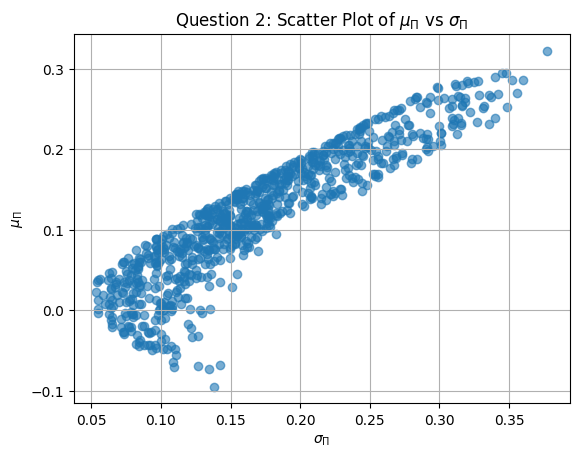

In [46]:
plt.scatter(df_random_weights['σ'], df_random_weights['μ'], alpha=0.6)
plt.xlabel('$\sigma_\Pi$')
plt.ylabel('$\mu_\Pi$')
plt.title('Question 2: Scatter Plot of $\mu_\Pi$ vs $\sigma_\Pi$')
plt.grid(True)

### Plot Identification and Explanation: ###
### The shape of the plots is the Efficient Frontier, and all the dots fall on/near or inside the Efficient Frontier. ###
### This means, in the Modern Portfolio Theory, the Efficient Frontier represents the portfolios that offer the highest possible expected return for a defined level of risk or the lowest possible risk for a given level of expected return. ### 
### To optimize a portfolio, the investor needs to seek for one that is on the Efficient Frontier while satisfying other constraints to construct the portfolio. ###

Then I copy-paste this plot image onto the Excel file of 'Question_2.xlsx'.

# Products and Market Risk #

# Question 3 #

*\* In the code for this question, some of the variables will be re-written.*

First of all, we will define our vector of returns $μ$, though it may not be very useful here:
$${\mu} = \begin{pmatrix}0\\ 0\\ 0\end{pmatrix}$$

In [15]:
mu = np.array([[0], [0], [0]])

Then, we need to construct the standard deviation matrix $S$:
$$ S = \begin{pmatrix}
0.3 & 0 & 0 
\\ 0 & 0.2 & 0 
\\ 0 & 0 & 0.15 
\end{pmatrix} $$

In [17]:
S = np.array([[0.3, 0, 0], [0, 0.2, 0], [0, 0, 0.15]])

With $S$, we can have the convariance matrix $\Sigma$ with the following calculation, where $Corr$ is the correlation matrix as indicated: $$ \Sigma = SCorrS = \begin{pmatrix}
0.3 & 0 & 0 
\\ 0 & 0.2 & 0 
\\ 0 & 0 & 0.15 
\end{pmatrix} 
\begin{pmatrix}
1 & 0.8 & 0.5 
\\ 0.8 & 1 & 0.3 
\\ 0.5 & 0.3 & 1 
\end{pmatrix}
\begin{pmatrix}
0.3 & 0 & 0 
\\ 0 & 0.2 & 0 
\\ 0 & 0 & 0.15 
\end{pmatrix} = 
\begin{pmatrix}
0.09 & 0.048 & 0.0225
\\ 0.048 & 0.04 & 0.009
\\ 0.0225  & 0.009 & 0.0225 
\end{pmatrix}$$

In [20]:
Corr = np.array([[1, 0.8, 0.5], [0.8, 1, 0.3], [0.5, 0.3, 1]])

In [21]:
SIGMA = S@Corr@S
print (SIGMA) 

[[0.09   0.048  0.0225]
 [0.048  0.04   0.009 ]
 [0.0225 0.009  0.0225]]


Meanwhile, we have our given weights of each asset and use them to make the vector of weights: $$w = \begin{pmatrix}0.5\\ 0.2 \\ 0.3\end{pmatrix}$$

In [22]:
w = np.array([[0.5], [0.2], [0.3]])

And the confidence related parameters:
$$ c = 0.99 $$
Please note, according to the equation to calculate $Factor$ in the question: $ Factor = \Phi^{-1}(1-c)$, it will become <b>negative</b>:
$$ Factor = \Phi^{-1}(1-c) = \Phi^{-1}(0.01) \approx -2.32635$$
$$ \phi(Factor) = \phi(\Phi^{-1}(0.01)) \approx 0.0266521$$ 

In [23]:
Factor = float(norm.ppf(0.01))
print(Factor)

-2.3263478740408408


In [24]:
phi_Factor = float(norm.pdf(norm.ppf(0.01)))
print(phi_Factor)

0.02665214220345808


Next, we will do some general calculation for this question.

$$ \sqrt{w^T{\Sigma}w} = \sqrt{ \begin{pmatrix}
0.5 & 0.2 & 0.3
\end{pmatrix}
\begin{pmatrix}
0.09 & 0.048 & 0.0225
\\ 0.048 & 0.04 & 0.009
\\ 0.0225  & 0.009 & 0.0225 
\end{pmatrix}
\begin{pmatrix}
0.5
\\ 0.2
\\ 0.3
\end{pmatrix}} \approx 0.208698 $$

In [26]:
float(np.sqrt(w.T@SIGMA@w)[0,0])

0.20869834690289238

$$ \Sigma w = \begin{pmatrix}
0.09 & 0.048 & 0.0225
\\ 0.048 & 0.04 & 0.009
\\ 0.0225  & 0.009 & 0.0225 
\end{pmatrix}
\begin{pmatrix}
0.5
\\ 0.2
\\ 0.3
\end{pmatrix} =
\begin{pmatrix}
0.06135
\\ 0.0347
\\ 0.0198
\end{pmatrix}$$

In [27]:
SIGMA@w

array([[0.06135],
       [0.0347 ],
       [0.0198 ]])

Now, we apply these values to the formulas:

$$ \frac{\partial VaR(w)}{\partial w_1} = \mu_1 + Factor \times \frac{(\Sigma w)_1}{\sqrt{w^T{\Sigma}w}} \approx 0-2.32635 \times \frac{0.06135}{0.208698} \approx -0.683865$$
$$ \frac{\partial VaR(w)}{\partial w_2} = \mu_2 + Factor \times \frac{(\Sigma w)_2}{\sqrt{w^T{\Sigma}w}} \approx 0-2.32635 \times \frac{0.0347}{0.208698} \approx -0.386799$$
$$ \frac{\partial VaR(w)}{\partial w_3} = \mu_3 + Factor \times \frac{(\Sigma w)_3}{\sqrt{w^T{\Sigma}w}} \approx 0-2.32635 \times \frac{0.0198}{0.208698} \approx -0.220709$$

In [28]:
partial_VaR1 = Factor*float((SIGMA@w)[0,0])/float(np.sqrt(w.T@SIGMA@w)[0,0])
partial_VaR2 = Factor*float((SIGMA@w)[1,0])/float(np.sqrt(w.T@SIGMA@w)[0,0])
partial_VaR3 = Factor*float((SIGMA@w)[2,0])/float(np.sqrt(w.T@SIGMA@w)[0,0])
print (partial_VaR1)
print (partial_VaR2)
print (partial_VaR3)

-0.6838647463691413
-0.3867988051998242
-0.2207094046961532


$$ \frac{\partial ES(w)}{\partial w_1} = \mu_1 - \frac{\phi(Factor)}{1-c} \times \frac{(\Sigma w)_1}{\sqrt{w^T{\Sigma}w}} \approx 0-\frac{0.0266521}{0.01} \times \frac{0.06135}{0.208698} \approx -0.783480$$
$$ \frac{\partial ES(w)}{\partial w_2} = \mu_2 - \frac{\phi(Factor)}{1-c} \times \frac{(\Sigma w)_2}{\sqrt{w^T{\Sigma}w}} \approx 0-\frac{0.0266521}{0.01} \times \frac{0.0347}{0.208698} \approx -0.443142$$
$$ \frac{\partial ES(w)}{\partial w_3} = \mu_3 - \frac{\phi(Factor)}{1-c} \times \frac{(\Sigma w)_3}{\sqrt{w^T{\Sigma}w}} \approx 0-\frac{0.0266521}{0.01} \times \frac{0.0198}{0.208698} \approx -0.252859$$

In [29]:
partial_ES1 = -phi_Factor/0.01*float((SIGMA@w)[0,0])/float(np.sqrt(w.T@SIGMA@w)[0,0])
partial_ES2 = -phi_Factor/0.01*float((SIGMA@w)[1,0])/float(np.sqrt(w.T@SIGMA@w)[0,0])
partial_ES3 = -phi_Factor/0.01*float((SIGMA@w)[2,0])/float(np.sqrt(w.T@SIGMA@w)[0,0])
print (partial_ES1)
print (partial_ES2)
print (partial_ES3)

-0.7834795763585859
-0.4431416674758425
-0.2528589341792991


Create the summary table and export it as Excel.

In [30]:
df_summary_table = pd.DataFrame({'Asset':[1,2,3], 
                                 'μ':[0, 0, 0], 
                                 'σ':[0.3, 0.2, 0.15],
                                 'w':[0.5, 0.2, 0.3],
                                 '∂VaR(w)/∂wi':[partial_VaR1, partial_VaR2, partial_VaR3],
                                 '∂ES(w)/∂wi':[partial_ES1, partial_ES2, partial_ES3]
                                })

### My answer to the question is the table below: ###

In [31]:
df_summary_table

,Asset,μ,σ,w,∂VaR(w)/∂wi,∂ES(w)/∂wi
0,1,0,0.30,0.5,-0.683865,-0.783480
1,2,0,0.20,0.2,-0.386799,-0.443142
2,3,0,0.15,0.3,-0.220709,-0.252859


Now, I will export the table to an Excel sheet.

In [76]:
df_summary_table.to_excel('./Question_3.xlsx', index=False)

# Question 4 #

This questions is to test the Expected Shortfalls with differernt confidence levels. To start with, I will create a dataframe that include all the requested confidence levels: $ 99.95, 99.75, 99.5, 99.25, 99, 98.5, 98, 97.5$

In [32]:
df_ES_multiple_c = pd.DataFrame({'Confidence Level (c)':[0.9995, 0.9975, 0.995, 0.9925, 0.99, 0.985, 0.98, 0.975]})

In [33]:
df_ES_multiple_c

,Confidence Level (c)
0,0.9995
1,0.9975
2,0.9950
3,0.9925
4,0.9900
5,0.9850
6,0.9800
7,0.9750


As mentioned in the question, the most important step is to calculate $\phi(\Phi^{-1}(1-c))$. I will include this value as a separate column in the dataframe. And after calculation with the code below, we have following results:
$$\phi(\Phi^{-1}(1-0.9995))\approx 0.001777$$
$$\phi(\Phi^{-1}(1-0.9975))\approx 0.007761$$
$$\phi(\Phi^{-1}(1-0.995))\approx 0.014460$$
$$\phi(\Phi^{-1}(1-0.9925))\approx 0.020709$$
$$\phi(\Phi^{-1}(1-0.99))\approx 0.026652$$
$$\phi(\Phi^{-1}(1-0.985))\approx 0.037870$$
$$\phi(\Phi^{-1}(1-0.98))\approx 0.048418$$
$$\phi(\Phi^{-1}(1-0.975))\approx 0.058445$$

In [34]:
df_ES_multiple_c['ϕ(Φ−1(1 − c))'] = df_ES_multiple_c.apply(lambda row: float(norm.pdf(norm.ppf(1-row['Confidence Level (c)']))), axis=1)

In [35]:
df_ES_multiple_c

,Confidence Level (c),ϕ(Φ−1(1 − c))
0,0.9995,0.001777
1,0.9975,0.007761
2,0.9950,0.014460
3,0.9925,0.020709
4,0.9900,0.026652
5,0.9850,0.037870
6,0.9800,0.048418
7,0.9750,0.058445


Then, I will apply the formula of calculation Expected Shortfall $ ES_c(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-c))}{1-c}$ to have the following results, and incorporate them into my dataframe:
$$ ES_{0.9975}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.9975))}{1-0.9975}\approx \mu - 3.554381\sigma $$
$$ ES_{0.995}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.995))}{1-0.995}\approx \mu - 3.104357\sigma$$
$$ ES_{0.9925}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.9925))}{1-0.9925}\approx \mu - 2.891949\sigma$$
$$ ES_{0.99}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.99))}{1-0.99}\approx \mu - 2.761240\sigma$$
$$ ES_{0.985}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.985))}{1-0.985}\approx \mu - 2.665214\sigma$$
$$ ES_{0.98}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.98))}{1-0.98}\approx \mu - 2.524695\sigma$$
$$ ES_{0.975}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.975))}{1-0.975}\approx \mu - 2.420907\sigma$$
$$ ES_{0.975}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-0.975))}{1-0.975}\approx \mu - 2.337803\sigma$$

In [36]:
df_ES_multiple_c['ES'] = df_ES_multiple_c.apply(lambda row: 'μ − '+str(round(row['ϕ(Φ−1(1 − c))']/(1-row['Confidence Level (c)']), 6)) +'σ', axis=1)

### My answer to the question is the table below: ###

In [37]:
df_ES_multiple_c

,Confidence Level (c),ϕ(Φ−1(1 − c)),ES
0,0.9995,0.001777,μ − 3.554381σ
1,0.9975,0.007761,μ − 3.104357σ
2,0.9950,0.014460,μ − 2.891949σ
3,0.9925,0.020709,μ − 2.76124σ
4,0.9900,0.026652,μ − 2.665214σ
5,0.9850,0.037870,μ − 2.524695σ
6,0.9800,0.048418,μ − 2.420907σ
7,0.9750,0.058445,μ − 2.337803σ


Now, I would like to export it to Excel.

In [122]:
df_ES_multiple_c.to_excel('./Question_4.xlsx', index=False)

# Question 5 #

The derivation process is as follows. <br>
Since: 
$$ \sigma^2_t =  \sum_{i=1}^{n\rightarrow\infty} \alpha_iu^2_{n-i} = \alpha_1{u^2_{n-1}} + \alpha_2{u^2_{n-2}} + \alpha_3{u^2_{n-3}} + \alpha_4{u^2_{n-4}} + ...$$
and
$$ \alpha_{i+1} = \lambda \alpha_i $$
So, we have:
$$ \sigma^2_t = \alpha_1{u^2_{n-1}} + \lambda \alpha_1{u^2_{n-2}} + \lambda^2 \alpha_1{u^2_{n-3}} + \lambda^3 \alpha_1{u^2_{n-4}} + ...$$

Consequently, we can also deduct the expression of $\sigma^2_{t-1}$:
$$ \sigma^2_{t-1} = \alpha_1{u^2_{n-2}} + \lambda \alpha_1{u^2_{n-3}} + \lambda^2 \alpha_1{u^2_{n-4}} + \lambda^3 \alpha_1{u^2_{n-5}} + ...$$
By multiplying $\lambda$ to both sides, we have:
$$ \lambda \sigma^2_{t-1} = \lambda \alpha_1{u^2_{n-2}} + \lambda^2 \alpha_1{u^2_{n-3}} + \lambda^3 \alpha_1{u^2_{n-4}} + \lambda^4 \alpha_1{u^2_{n-5}} + ...$$
This is exactly the expression of $\sigma^2_t$ excluding the first item, therefore:
$$ \sigma^2_t = \alpha_1{u^2_{n-1}} + \lambda \sigma^2_{t-1}$$

Now, consider the relationship between $\alpha$ and $\lambda$.<br>
We know that:
$$\alpha_1+ \alpha_2+ \alpha_3+ \alpha_4+ .... = 1$$
So: 
$$\alpha_1(1+ \lambda+ \lambda^2+ \lambda^3+ .... )= 1$$
Since $0<\lambda<1$, according to the sum of an infinite geometric series, we have:
$$ 1+ \lambda+ \lambda^2+ \lambda^3+ .... = \frac{1}{1-\lambda} $$
then:
$$ \frac{\alpha}{1-\lambda} = 1 $$
Consequently:
$$ \alpha = 1-\lambda $$

Finally, by substituting $\alpha$ in the expression of $\sigma^2_t$, we have:
$$ \sigma^2_t = \lambda \sigma^2_{t-1} + (1-\lambda){u^2_{n-1}}$$

# VaR Backtesting #

# Question 6 #

## Preparation ##

First, import the data as a dataframe 'df_SP500'.

In [38]:
df_SP500 = pd.read_csv('./CQF E1 2025 - Data_SP500.csv', parse_dates=['Date'], dayfirst=True)

Check the data.

In [39]:
df_SP500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1250 non-null   datetime64[ns]
 1   SP500   1250 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.7 KB


In [40]:
df_SP500.head()

,Date,SP500
0,2013-01-22,1492.560059
1,2013-01-23,1494.810059
2,2013-01-24,1494.819946
3,2013-01-25,1502.959961
4,2013-01-28,1500.180054


Create a column of 'Return' to host the values of daily returns, calculated from the function: 
$$R_1 = ln(S_{(t+1)}/St) $$

In [41]:
df_SP500['Return'] = np.nan
for i in df_SP500.index:
    if i>0:
        df_SP500.at[i,'Return'] = np.log(df_SP500.at[i,'SP500'] / df_SP500.at[i-1,'SP500'])

Create a column of '21 Day Rolling σ' to host the values of standard deviation from 21 daily returns.

In [42]:
df_SP500['21 Day Rolling σ'] = df_SP500['Return'].rolling(window=21).std()

Create a column of '10 Day VaR' to host the values of Value at Risk for 10 days from the function:
$$ VaR_{10D,t} = Factor \times \sigma_t \times \sqrt{10} $$
Meanwhile, since we know the confidence level $(c)$ is $0.99$, we can calculate the $Factor$ as $-2.32635 $.
$$ Factor = \Phi^{-1}(1-c) = \Phi^{-1}(0.01) \approx -2.32635$$

In [43]:
Factor = float(norm.ppf(0.01))
print(Factor)

-2.3263478740408408


In [44]:
df_SP500['10 Day VaR'] = Factor*df_SP500['21 Day Rolling σ']*np.sqrt(10)

Create a column of '10 Day Return' to host the values of 10 day returns, calculated from the function: 
$$ R_{10} = ln(S_{(t+10)}/St) $$

In [45]:
df_SP500['10 Day Return'] = np.nan
for i in df_SP500.index:
    if i>9:
        df_SP500.at[i,'10 Day Return'] = np.log(df_SP500.at[i,'SP500'] / df_SP500.at[i-10,'SP500'])

Check the data now.

In [51]:
df_SP500.head(25)

,Date,SP500,Return,21 Day Rolling σ,10 Day VaR,10 Day Return
0,2013-01-22,1492.560059,NaN,NaN,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN,NaN,NaN
2,2013-01-24,1494.819946,0.000007,NaN,NaN,NaN
3,2013-01-25,1502.959961,0.005431,NaN,NaN,NaN
4,2013-01-28,1500.180054,-0.001851,NaN,NaN,NaN
5,2013-01-29,1507.839966,0.005093,NaN,NaN,NaN
6,2013-01-30,1501.959961,-0.003907,NaN,NaN,NaN
7,2013-01-31,1498.109985,-0.002567,NaN,NaN,NaN
8,2013-02-01,1513.170044,0.010003,NaN,NaN,NaN
9,2013-02-04,1495.709961,-0.011606,NaN,NaN,NaN


Now, let's dive into the 3 questions.

## (a) The count and percentage of VaR breaches. ##

Create a column 'VaR Breach' to host the values of whether the 10 Day Return is smaller than the 10 Day VaR: if yes, the value is 1, if no, 0. <br>
Meanwhile, we know that the 10 Day VaR only starts from row 21, so we will calculate from here.

In [52]:
df_SP500['VaR Breach'] = np.nan
for i in df_SP500.index:
    if i>20:
        if df_SP500.at[i,'10 Day Return']<df_SP500.at[i,'10 Day VaR']:
            df_SP500.at[i,'VaR Breach'] = 1
        else:
            df_SP500.at[i,'VaR Breach'] = 0

In [55]:
df_SP500.head(25)

,Date,SP500,Return,21 Day Rolling σ,10 Day VaR,10 Day Return,VaR Breach
0,2013-01-22,1492.560059,NaN,NaN,NaN,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN,NaN,NaN,NaN
2,2013-01-24,1494.819946,0.000007,NaN,NaN,NaN,NaN
3,2013-01-25,1502.959961,0.005431,NaN,NaN,NaN,NaN
4,2013-01-28,1500.180054,-0.001851,NaN,NaN,NaN,NaN
5,2013-01-29,1507.839966,0.005093,NaN,NaN,NaN,NaN
6,2013-01-30,1501.959961,-0.003907,NaN,NaN,NaN,NaN
7,2013-01-31,1498.109985,-0.002567,NaN,NaN,NaN,NaN
8,2013-02-01,1513.170044,0.010003,NaN,NaN,NaN,NaN
9,2013-02-04,1495.709961,-0.011606,NaN,NaN,NaN,NaN


Then, we calculate the count of the VaR breaches by simply having the sum of the values of column 'VaR Breach'.

In [53]:
int(df_SP500['VaR Breach'].sum())

3

Then, we calculate the percentage of the VaR breaches by dividing the VaR breaches with total data amount with valid VaR breach record, which is 21 less than the total data amount.

In [54]:
int(df_SP500['VaR Breach'].sum())/(len(df_SP500['VaR Breach'])-21)

0.0024410089503661514

### There are 3 VaR breaches, which is 0.244% of the total data.  ###
### This is quite good as it is much lower than 1% which is expected from the confidence level 99%. ###

## (b) The count and percentage of consecutive VaR breaches. ##

Since there are only 3 VaR breaches, I can directly isolate them from the data set by creating a new dataframe 'df_SP500_VaR_Breach'.

In [56]:
df_SP500_VaR_Breach = df_SP500[df_SP500['VaR Breach'] == 1]

In [57]:
df_SP500_VaR_Breach

,Date,SP500,Return,21 Day Rolling σ,10 Day VaR,10 Day Return,VaR Breach
652,2015-08-24,1893.209961,-0.040211,0.013055,-0.096040,-0.105652,1.0
653,2015-08-25,1867.609985,-0.013614,0.013205,-0.097146,-0.109663,1.0
750,2016-01-13,1890.280029,-0.025282,0.012386,-0.091120,-0.094854,1.0


The consecutive VaR breaches only happend once on 25th August, 2015.

Then, we calculate the percentage of the consecutive VaR breaches by dividing the VaR breaches with total data amount with valid VaR breach record and also excluding the first day with valid VaR breach record as this day cannot have consecutive VaR breach. This is 22 less than the total data amount.

In [59]:
1/(len(df_SP500['VaR Breach'])-22)

0.0008143322475570033

### There is only 1 consecutive VaR breach, which is 0.081% of the total data.

## (c) Provide a plot which identifies the breaches visually, with crosses or other marks. ##

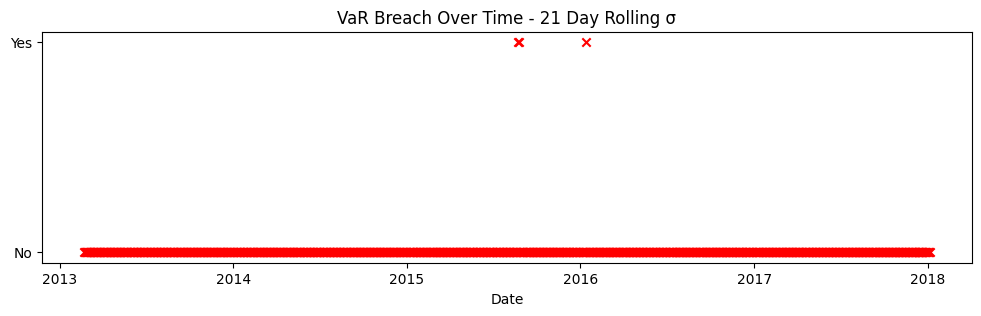

In [60]:
plt.figure(figsize=(12, 3))
plt.scatter(df_SP500['Date'], df_SP500['VaR Breach'], color='r', marker='x')
plt.xlabel('Date')
plt.yticks([0, 1], ['No','Yes'])
plt.title('VaR Breach Over Time - 21 Day Rolling σ')
plt.show()

Because there is a consecutive breach here, these 2 breaches are almost overlapped with each other in the full plot. So, I will isolate the period of time that only covers all the 3 breaches and do a close-up plot.

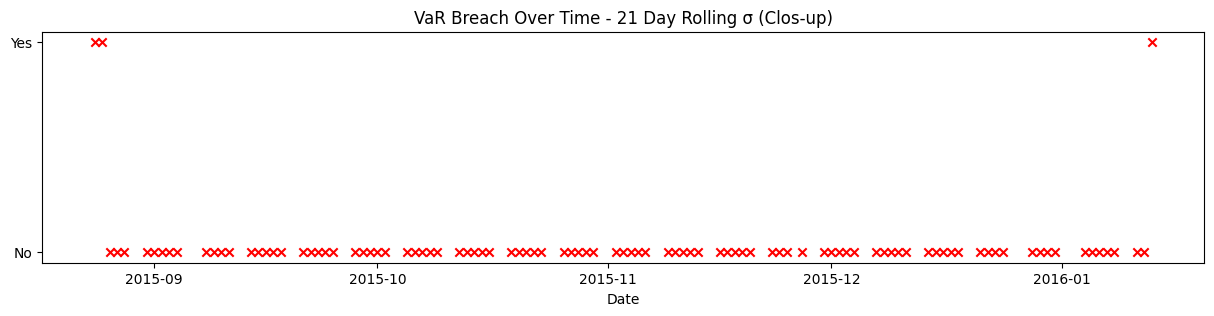

In [62]:
plt.figure(figsize=(15, 3))
plt.scatter(df_SP500[df_SP500_VaR_Breach.index[0]: df_SP500_VaR_Breach.index[-1]+1]['Date'],
            df_SP500[df_SP500_VaR_Breach.index[0]: df_SP500_VaR_Breach.index[-1]+1]['VaR Breach'],
            color='r', marker='x')
plt.xlabel('Date')
plt.yticks([0, 1], ['No','Yes'])
plt.title('VaR Breach Over Time - 21 Day Rolling σ (Clos-up)')
plt.show()

Now, I would like to export the dataframe 'df_SP500' as Excel sheet to submit as part of the exame for full inspection. The plot image will also be copy-pasted to the Excel sheet.

In [253]:
df_SP500.to_excel('./Question_6.xlsx', index=False)

# Question 7 #

## Preparation ##

Reimport the data as dataframe 'df_SP500_2'. Create a column of 'Return' to host the values of daily returns as in Question 6.

In [67]:
df_SP500_2 = pd.read_csv('./CQF E1 2025 - Data_SP500.csv', parse_dates=['Date'], dayfirst=True)

In [68]:
df_SP500_2['Return'] = np.nan
for i in df_SP500_2.index:
    if i>0:
        df_SP500_2.at[i,'Return'] = np.log(df_SP500_2.at[i,'SP500'] / df_SP500_2.at[i-1,'SP500'])

This is the part different from Question 6, where I will create a column of 'EMWA σ' to host the values of standard deviation based on the EMWA equation:
$$ \sigma^2_{t+1|t} = \lambda \sigma^2_{t|t-1} + (1-\lambda)r^2_t$$
As we set $ \lambda = 0.72$, the equation becomes:
$$ \sigma^2_{t+1|t} = 0.72 \sigma^2_{t|t-1} + 0.28r^2_t$$
Accordingly:
$$ \sigma_{t+1|t} = \sqrt{0.72 \sigma^2_{t|t-1} + 0.28r^2_t}$$
Below is the code to create the column of 'EMWA σ'.

In [70]:
df_SP500_2['EMWA σ'] = np.nan

#Manually calculate value on the day 3 which is at row 2, as we think EMWA σ in the previous day is zero:
df_SP500_2.at[2,'EMWA σ'] = np.sqrt(0.28*df_SP500_2.at[2,'Return']**2)

#The actual calculation with the equation starts from day 4 which is at row 3
for i in df_SP500_2.index:
    if i>2:
        df_SP500_2.at[i,'EMWA σ'] = np.sqrt(0.72*df_SP500_2.at[i-1,'EMWA σ']**2 + 0.28*df_SP500_2.at[i-1,'Return']**2)

Check the data.

In [71]:
df_SP500_2.head()

,Date,SP500,Return,EMWA σ
0,2013-01-22,1492.560059,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN
2,2013-01-24,1494.819946,0.000007,0.000003
3,2013-01-25,1502.959961,0.005431,0.000005
4,2013-01-28,1500.180054,-0.001851,0.002874


Create a column of '10 Day VaR' to host the values of Value at Risk for 10 days from the function:
$$ VaR_{10D,t} = Factor \times \sigma_t \times \sqrt{10} $$
Meanwhile, since we know the confidence level $(c)$ is $0.99$, we can calculate the $Factor$ as $-2.32635 $.
$$ Factor = \Phi^{-1}(1-c) = \Phi^{-1}(0.01) \approx -2.32635$$

In [72]:
Factor = float(norm.ppf(0.01))
print(Factor)

-2.3263478740408408


In [73]:
df_SP500_2['10 Day VaR'] = Factor*df_SP500_2['EMWA σ']*np.sqrt(10)

Create a column of '10 Day Return' to host the values of 10 day returns, calculated from the function: 
$$ R_{10} = ln(S_{(t+10)}/St) $$

In [74]:
df_SP500_2['10 Day Return'] = np.nan
for i in df_SP500.index:
    if i>9:
        df_SP500_2.at[i,'10 Day Return'] = np.log(df_SP500_2.at[i,'SP500'] / df_SP500_2.at[i-10,'SP500'])

Check the data now.

In [75]:
df_SP500_2.head(15)

,Date,SP500,Return,EMWA σ,10 Day VaR,10 Day Return
0,2013-01-22,1492.560059,NaN,NaN,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN,NaN,NaN
2,2013-01-24,1494.819946,0.000007,0.000003,-0.000026,NaN
3,2013-01-25,1502.959961,0.005431,0.000005,-0.000034,NaN
4,2013-01-28,1500.180054,-0.001851,0.002874,-0.021140,NaN
5,2013-01-29,1507.839966,0.005093,0.002628,-0.019332,NaN
6,2013-01-30,1501.959961,-0.003907,0.003498,-0.025732,NaN
7,2013-01-31,1498.109985,-0.002567,0.003617,-0.026610,NaN
8,2013-02-01,1513.170044,0.010003,0.003356,-0.024691,NaN
9,2013-02-04,1495.709961,-0.011606,0.006010,-0.044216,NaN


Now, let's dive into the 3 questions.

## (a) The count and percentage of VaR breaches. ##

Create a column 'VaR Breach' to host the values of whether the 10 Day Return is smaller than the 10 Day VaR: if yes, the value is 1, if no, 0. <br>
Meanwhile, we know that the 10 Day Return only starts from row 10, so we will calculate from here.

In [76]:
df_SP500_2['VaR Breach'] = np.nan
for i in df_SP500.index:
    if i>9:
        if df_SP500_2.at[i,'10 Day Return']<df_SP500_2.at[i,'10 Day VaR']:
            df_SP500_2.at[i,'VaR Breach'] = 1
        else:
            df_SP500_2.at[i,'VaR Breach'] = 0

In [77]:
df_SP500_2.head(15)

,Date,SP500,Return,EMWA σ,10 Day VaR,10 Day Return,VaR Breach
0,2013-01-22,1492.560059,NaN,NaN,NaN,NaN,NaN
1,2013-01-23,1494.810059,0.001506,NaN,NaN,NaN,NaN
2,2013-01-24,1494.819946,0.000007,0.000003,-0.000026,NaN,NaN
3,2013-01-25,1502.959961,0.005431,0.000005,-0.000034,NaN,NaN
4,2013-01-28,1500.180054,-0.001851,0.002874,-0.021140,NaN,NaN
5,2013-01-29,1507.839966,0.005093,0.002628,-0.019332,NaN,NaN
6,2013-01-30,1501.959961,-0.003907,0.003498,-0.025732,NaN,NaN
7,2013-01-31,1498.109985,-0.002567,0.003617,-0.026610,NaN,NaN
8,2013-02-01,1513.170044,0.010003,0.003356,-0.024691,NaN,NaN
9,2013-02-04,1495.709961,-0.011606,0.006010,-0.044216,NaN,NaN


Then, we calculate the count of the VaR breaches by simply having the sum of the values of column 'VaR Breach'.

In [78]:
int(df_SP500_2['VaR Breach'].sum())

3

Then, we calculate the percentage of the VaR breaches by dividing the VaR breaches with total data amount with valid VaR breach record, which is 10 less than the total data amount.

In [79]:
int(df_SP500_2['VaR Breach'].sum())/(len(df_SP500_2['VaR Breach'])-10)

0.0024193548387096775

### There are 3 VaR breaches, which is 0.242% of the total data.  ###
### This is good as well, and the result is similar to that based on 21 Day Rolling σ. ###

## (b) The count and percentage of consecutive VaR breaches. ##

Since there are only 3 VaR breaches, I can directly isolate them from the data set by creating a new dataframe 'df_SP500_VaR_Breach'.

In [80]:
df_SP500_2_VaR_Breach = df_SP500_2[df_SP500_2['VaR Breach'] == 1]

In [82]:
df_SP500_2_VaR_Breach

,Date,SP500,Return,EMWA σ,10 Day VaR,10 Day Return,VaR Breach
750,2016-01-13,1890.280029,-0.025282,0.011187,-0.082294,-0.094854,1.0
916,2016-09-09,2127.810059,-0.024828,0.002499,-0.018381,-0.020771,1.0
1147,2017-08-10,2438.209961,-0.014580,0.001686,-0.012404,-0.015146,1.0


### There is no consecutive VaR breach, 0% of the total data.

## (c) Provide a plot which identifies the breaches visually, with crosses or other marks. ##

Since there are only 3 VaR breaches, I will only use cross mark to illustrate them and ignore the regular days.<br>
Meanwhile, to focus on the dates with the breaches without having too much empty space, I will directly plot the dataframe 'df_SP500_2_VaR_Breach'.

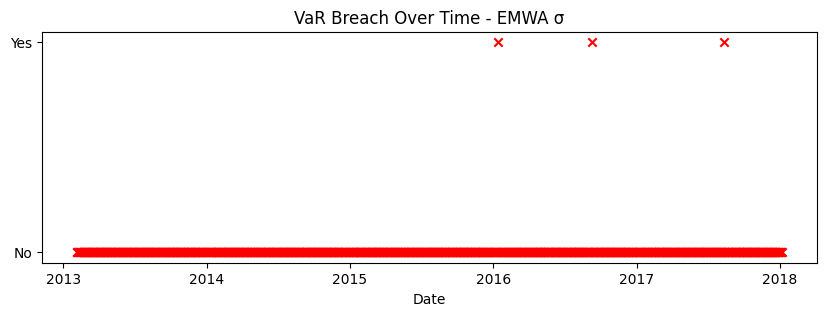

In [83]:
plt.figure(figsize=(10, 3))
plt.scatter(df_SP500_2['Date'], df_SP500_2['VaR Breach'], color='r', marker='x')
plt.xlabel('Date')
plt.yticks([0, 1], ['No','Yes'])
plt.title('VaR Breach Over Time - EMWA σ')
plt.show()

Now, I would like to export the dataframe 'df_SP500_2' as Excel sheet to submit as part of the exame for full inspection. The plot image will also be copy-pasted to the Excel sheet.

In [321]:
df_SP500_2.to_excel('./Question_7.xlsx', index=False)

# My answers to the exam are completed, thank you! #